Name Surname: Weronika Jopek

Student No: 912400002

---

Libraries to be used

---

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Logistic Regression (35 points)

Logistic Regression with MSE Loss (5 points)

In [62]:
class LogisticRegressionMSE:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Compute accuracy of train and test data every 100 iterations during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        # implement here
        return 1 / (1+ np.exp(-z))

    def fit(self):
        # implement here
        n_samples = self.train_data.shape[0]

        for i in range(self.iterations):
            # Linear model
            linear_model = np.dot(self.train_data, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            error = predictions - self.train_label
            dw = (2 / n_samples) * np.dot(self.train_data.T, error * predictions * (1 - predictions))
            db = (2 / n_samples) * np.sum(error * predictions * (1 - predictions))

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and record accuracy every 100 iterations
            if i % 100 == 0:
                train_predictions = (self.sigmoid(np.dot(self.train_data, self.weights) + self.bias) >= 0.5).astype(int)
                train_accuracy = np.mean(train_predictions == self.train_label)
                self.accuracy_train_data_during_training.append(train_accuracy)

                test_predictions = (self.sigmoid(np.dot(self.test_data, self.weights) + self.bias) >= 0.5).astype(int)
                test_accuracy = np.mean(test_predictions == self.test_label)
                self.accuracy_test_data_during_training.append(test_accuracy)


    def predict(self, test_data):
        # implement here
        linear_model = np.dot(test_data, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        class_pred = [0 if self.train_label < 0.5 else 1 for self.train_label in predictions]
        return class_pred


Logistic Regression with Cross Entropy Loss (5 points)

In [63]:
class LogisticRegressionCrossEntropy:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Compute accuracy of train and test data every 100 iterations during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        # implement here
        return 1 / (1+ np.exp(-z))

    def fit(self):
        # implement here
        n_samples = self.train_data.shape[0]

        for i in range(self.iterations):
            # Linear model
            linear_model = np.dot(self.train_data, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            error = predictions - self.train_label
            dw = (1 / n_samples) * np.dot(self.train_data.T, error)
            db = (1 / n_samples) * np.sum(error)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and record accuracy every 100 iterations
            if i % 100 == 0:
                train_predictions = (self.sigmoid(np.dot(self.train_data, self.weights) + self.bias) >= 0.5).astype(int)
                train_accuracy = np.mean(train_predictions == self.train_label)
                self.accuracy_train_data_during_training.append(train_accuracy)

                test_predictions = (self.sigmoid(np.dot(self.test_data, self.weights) + self.bias) >= 0.5).astype(int)
                test_accuracy = np.mean(test_predictions == self.test_label)
                self.accuracy_test_data_during_training.append(test_accuracy)

    def predict(self, test_data):
        # implement here
        linear_model = np.dot(test_data, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        class_pred = [0 if self.train_label < 0.5 else 1 for self.train_label in predictions]
        return class_pred

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [64]:
### fill here ###

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Filter only two classes for binary classification
X = X[y != 2]  # We only use classes 0 and 1
y = y[y != 2]  # We only use classes 0 and 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Validate Logistic Regression with MSE Loss
model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=5000)
model_mse.fit()
predictions_mse = model_mse.predict(X_test)
accuracy_mse = accuracy_score(y_test, predictions_mse)
print(f"MSE Logistic Regression Accuracy: {accuracy_mse}")

# Validate Logistic Regression with Cross-Entropy Loss
model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=5000)
model_ce.fit()
predictions_ce = model_ce.predict(X_test)
accuracy_ce = accuracy_score(y_test, predictions_ce)
print(f"Cross-Entropy Logistic Regression Accuracy: {accuracy_ce}")

# Validate Sklearn Logistic Regression
library_model = LogisticRegression(max_iter=5000)
library_model.fit(X_train, y_train)
library_predictions = library_model.predict(X_test)
library_accuracy = accuracy_score(y_test, library_predictions)
print(f"Sklearn Logistic Regression Accuracy: {library_accuracy}")

MSE Logistic Regression Accuracy: 1.0
Cross-Entropy Logistic Regression Accuracy: 1.0
Sklearn Logistic Regression Accuracy: 1.0


#### Experiment

Dataset preparation

In [65]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use two Logistic Regression Methods on the dataset directly (10 points)
Show accuracy scores on test data

In [66]:
### fill here ###

# Apply Logistic Regression with MSE Loss
print("Logistic Regression with MSE Loss:")
model_mse = LogisticRegressionMSE(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=5000)
model_mse.fit()
predictions_mse = model_mse.predict(X_test)
accuracy_mse = accuracy_score(y_test, predictions_mse)
print(f"Accuracy: {accuracy_mse}")

# Apply Logistic Regression with Cross-Entropy Loss
print("\nLogistic Regression with Cross-Entropy Loss:")
model_ce = LogisticRegressionCrossEntropy(X_train, y_train, X_test, y_test, learning_rate=0.01, iterations=5000)
model_ce.fit()
predictions_ce = model_ce.predict(X_test)
accuracy_ce = accuracy_score(y_test, predictions_ce)
print(f"Accuracy: {accuracy_ce}")

Logistic Regression with MSE Loss:
Accuracy: 0.7947761194029851

Logistic Regression with Cross-Entropy Loss:
Accuracy: 0.8059701492537313


Plot the training and test accuracy across the learning iterations of gradient descent

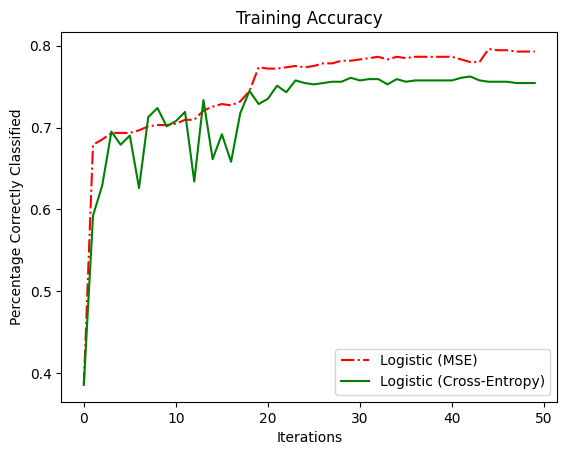

In [67]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Training Accuracy')
plt.plot(model_mse.accuracy_train_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_train_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

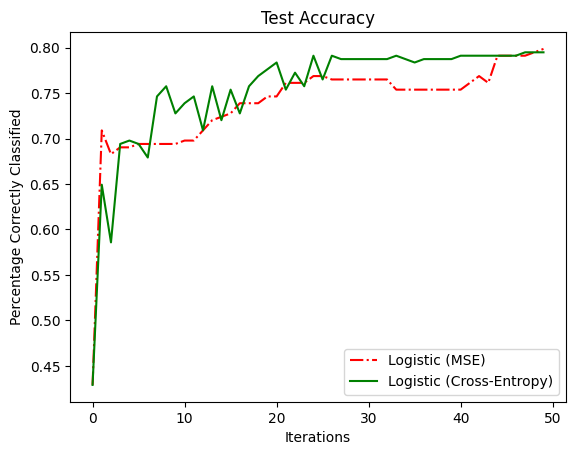

In [68]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Test Accuracy')
plt.plot(model_mse.accuracy_test_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_test_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

Explain the differences between MSE and Cross Entropy Loss in logistic regression, why is one of the versions of Logistic Regression learning faster in terms of gradient descent iterations than the other? (5 points)

Answer:

Training Accuracy Plot:
Logistic Regression with Cross-Entropy achieves smoother convergence, especially after initial iterations. MSE shows a slightly faster start but plateaus earlier. It's because Cross-Entropy gradients are sharper and more efficient, allowing the model to learn better even in later iterations.

Test Accuracy Plot:
Both methods stabilize to similar accuracy levels after 50 iterations, but Cross-Entropy shows slightly less fluctuation and maintains a consistent performance on the test set. It's beacuse Cross-Entropy is better suited for classification problems, leading to more robust generalization on unseen data.

Show the plots demonstrating the effects of the learning rate and the number of iterations parameters on the training process (hyperparameter tuning) (5 points)

Logistic Regression with MSE Loss


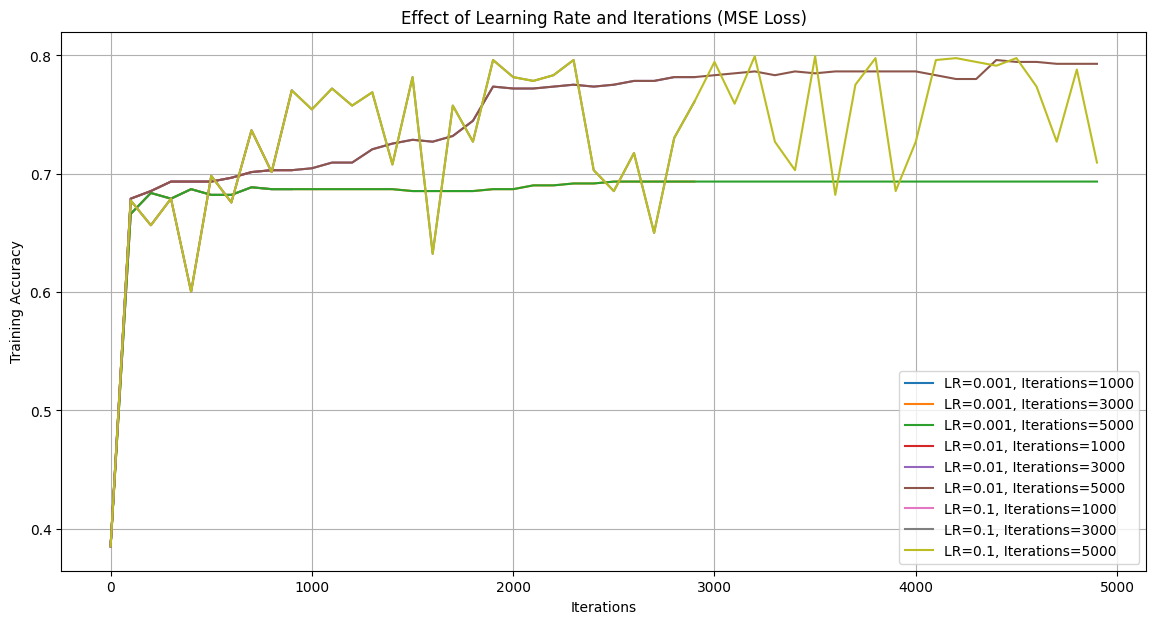


Logistic Regression with Cross-Entropy Loss


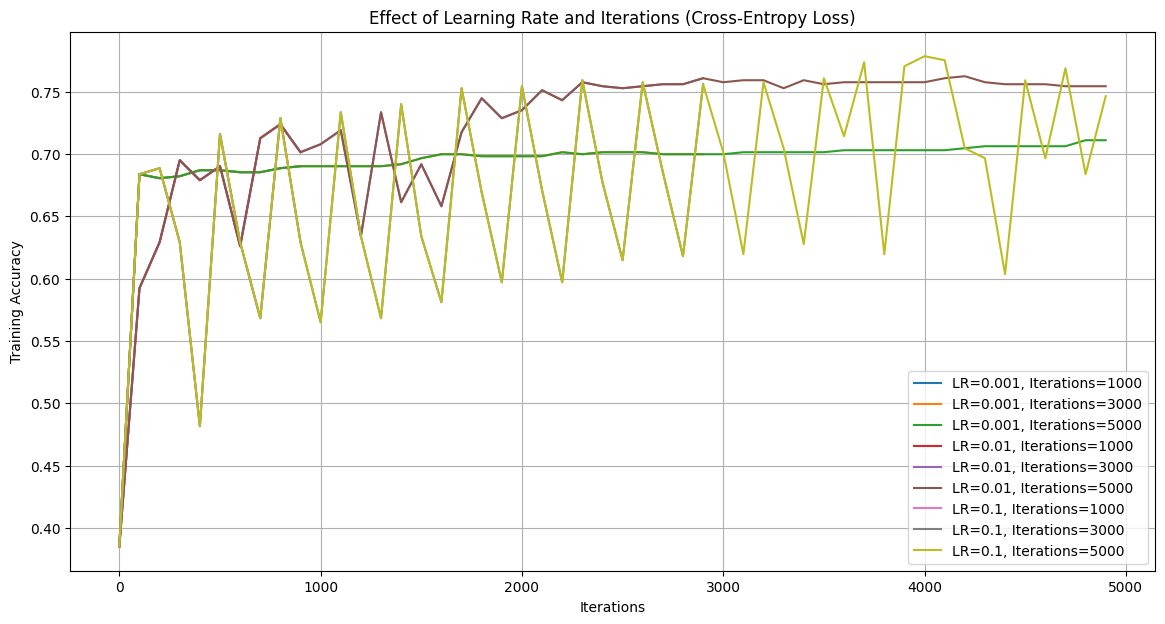

In [69]:
### fill here ###

def plot_hyperparameter_effects(model_class, learning_rates, iterations_list, loss_type):

    plt.figure(figsize=(14, 7))

    # Loop through all combinations of learning rates and iterations
    for lr in learning_rates:
        for iters in iterations_list:
            # Create and train the model for the current combination of hyperparameters
            model = model_class(X_train, y_train, X_test, y_test, learning_rate=lr, iterations=iters)
            model.fit()

            # Create the x-values corresponding to accuracy data recorded every 100 iterations
            x_values = range(0, iters, 100)  # Every 100 iterations
            y_values = model.accuracy_train_data_during_training

            # Plot training accuracy for each combination of learning_rate and iterations
            plt.plot(x_values, y_values, label=f"LR={lr}, Iterations={iters}")

    # Set the title and labels for the plot
    plt.title(f"Effect of Learning Rate and Iterations ({loss_type} Loss)")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Hyperparameters to test
learning_rates = [0.001, 0.01, 0.1]
iterations_list = [1000, 3000, 5000]

# Plot for MSE Loss
print("Logistic Regression with MSE Loss")
plot_hyperparameter_effects(LogisticRegressionMSE, learning_rates, iterations_list, "MSE")

# Plot for Cross-Entropy Loss
print("\nLogistic Regression with Cross-Entropy Loss")
plot_hyperparameter_effects(LogisticRegressionCrossEntropy, learning_rates, iterations_list, "Cross-Entropy")


#### Decision Tree (35 points)

Implement Decision Tree Method (5 points)

In [70]:
class DecisionTree:
    def __init__(self, columns, depth=None):
        self.max_depth = depth
        self.columns = columns
        self.tree = None

    def fit(self, train_data, train_label):
        # implement here
        def gini_impurity(labels):
            total = len(labels)
            if total == 0:
                return 0
            counts = {label: labels.count(label) for label in set(labels)}
            impurity = 1 - sum((count / total) ** 2 for count in counts.values())
            return impurity

        def best_split(data, labels):
            best_gini = float('inf')
            best_feature = None
            best_threshold = None
            best_splits = None

            for feature_idx, feature_name in enumerate(self.columns):
                values = [row[feature_idx] for row in data]
                thresholds = set(values)

                for threshold in thresholds:
                    left_indices = [i for i, value in enumerate(values) if value <= threshold]
                    right_indices = [i for i, value in enumerate(values) if value > threshold]

                    left_labels = [labels[i] for i in left_indices]
                    right_labels = [labels[i] for i in right_indices]

                    left_gini = gini_impurity(left_labels)
                    right_gini = gini_impurity(right_labels)
                    weighted_gini = (len(left_labels) / len(labels)) * left_gini + (len(right_labels) / len(labels)) * right_gini

                    if weighted_gini < best_gini:
                        best_gini = weighted_gini
                        best_feature = feature_name
                        best_threshold = threshold
                        best_splits = (left_indices, right_indices)

            return best_feature, best_threshold, best_splits

        def build_tree(data, labels, depth=0):
            if len(set(labels)) == 1:
                return labels[0]
            if self.max_depth is not None and depth >= self.max_depth:
                return max(set(labels), key=labels.count)

            feature, threshold, splits = best_split(data, labels)
            if not splits:
                return max(set(labels), key=labels.count)

            left_indices, right_indices = splits
            left_subtree = build_tree([data[i] for i in left_indices], [labels[i] for i in left_indices], depth + 1)
            right_subtree = build_tree([data[i] for i in right_indices], [labels[i] for i in right_indices], depth + 1)

            return {
                "feature": feature,
                "threshold": threshold,
                "left": left_subtree,
                "right": right_subtree,
            }

        self.tree = build_tree(train_data, train_label)

    def predict(self, test_data):
        # implement here
        def predict_instance(instance, tree):
            if isinstance(tree, dict):
                feature_idx = self.columns.index(tree["feature"])
                if instance[feature_idx] <= tree["threshold"]:
                    return predict_instance(instance, tree["left"])
                else:
                    return predict_instance(instance, tree["right"])
            return tree

        return [predict_instance(instance, self.tree) for instance in test_data]


    def print_tree(self):
        # Implement your print function for your decision tree using preorder traversal
        # Internal nodes should be printed as feature_name <= threshold value
        # Leaf nodes should be printed as Left/Right Leaf: label value
        # Add an extra tab (\t) for each depth level to better visualize the tree structure

        def print_subtree(tree, depth=0):
            if isinstance(tree, dict):
                print("\t" * depth + f"{tree['feature']} <= {tree['threshold']}")
                print_subtree(tree["left"], depth + 1)
                print_subtree(tree["right"], depth + 1)
            else:
                print("\t" * depth + f"Leaf: {tree}")

        print_subtree(self.tree)

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [71]:
### fill here ###

from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
columns = wine.feature_names

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Validate the custom DecisionTree implementation
print("\nCustom Decision Tree:")
custom_tree = DecisionTree(columns, depth=3)
custom_tree.fit(X_train.tolist(), y_train.tolist())  # Convert numpy arrays to lists
y_pred_custom = custom_tree.predict(X_test.tolist())

# Calculate accuracy for the custom Decision Tree manually
correct_custom = sum(y_pred_custom[i] == y_test[i] for i in range(len(y_test)))
accuracy_custom = correct_custom / len(y_test)

print("Accuracy:", accuracy_custom)
print("\nStructure:")
custom_tree.print_tree()

# Validate using sklearn's DecisionTreeClassifier
print("\nSklearn Decision Tree:")
sklearn_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
sklearn_tree.fit(X_train, y_train)
y_pred_sklearn = sklearn_tree.predict(X_test)

# Calculate accuracy for the sklearn Decision Tree manually
correct_sklearn = sum(y_pred_sklearn[i] == y_test[i] for i in range(len(y_test)))
accuracy_sklearn = correct_sklearn / len(y_test)

print("Accuracy:", accuracy_sklearn)


Custom Decision Tree:
Accuracy: 0.9629629629629629

Structure:
color_intensity <= 3.8
	ash <= 2.92
		od280/od315_of_diluted_wines <= 3.64
			Leaf: 1
			Leaf: 0
		Leaf: 0
	flavanoids <= 1.39
		Leaf: 2
		proline <= 714.0
			Leaf: 1
			Leaf: 0

Sklearn Decision Tree:
Accuracy: 0.9629629629629629


#### Experiment

Dataset preparation

In [72]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use Decision Tree Method on the dataset directly (10 points)
Show accuracy score on test data

In [73]:
# Custom DecisionTree Implementation
print("\nCustom Decision Tree:")
custom_tree = DecisionTree(columns, depth=3)  # Define the tree with a max depth of 3
custom_tree.fit(X_train.tolist(), y_train.tolist())  # Convert NumPy arrays to Python lists
y_pred_custom = custom_tree.predict(X_test.tolist())  # Predict on the test set

# Calculate and print accuracy
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print("Accuracy:", accuracy_custom)


Custom Decision Tree:
Accuracy: 0.8097014925373134


Print the decision tree (5 points)

In [74]:
custom_tree.print_tree()

Sex <= 0.0
	Fare <= 52.0
		Parch <= 0.0
			Leaf: 0
			Leaf: 0
		SibSp <= 1.0
			Leaf: 0
			Leaf: 0
	Pclass <= 2.0
		Fare <= 146.5208
			Leaf: 1
			Leaf: 1
		Fare <= 23.25
			Leaf: 1
			Leaf: 0


Show the impact of the max_depth hyperparameter on the accuracy score (hyperparameter tuning) (5 points)

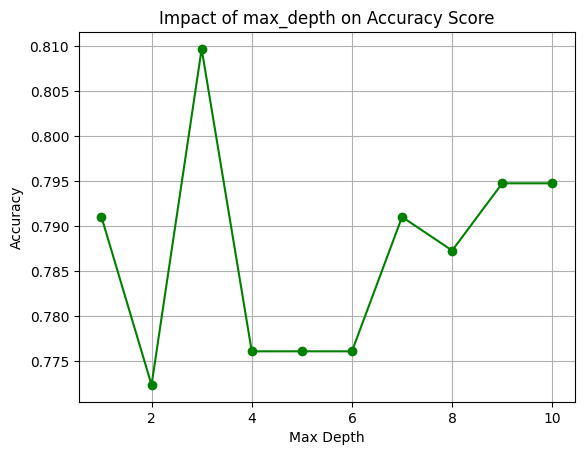

In [75]:
### fill here ###

# Initialize list to store accuracy scores
depths = list(range(1, 11))
accuracies = []

# Loop through different max_depth values
for depth in depths:
    # Initialize and fit DecisionTreeClassifier with max_depth
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    # Calculate accuracy on test data
    accuracy = dt.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the results
plt.plot(depths, accuracies, marker='o', color="green")
plt.title('Impact of max_depth on Accuracy Score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [76]:
iris = load_iris()
X = iris['data']
Y = iris['target']
columns = iris['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Show your implementation on different dataset (5 points)

In [77]:
### fill here ###

# Validate the custom DecisionTree implementation
print("\nCustom Decision Tree:")
custom_tree = DecisionTree(columns, depth=3)
custom_tree.fit(X_train.tolist(), y_train.tolist())
y_pred_custom = custom_tree.predict(X_test.tolist())

# Calculate accuracy
accuracy_custom = accuracy_score(y_test, y_pred_custom)

print("Accuracy:", accuracy_custom)
print("\nStructure:")
custom_tree.print_tree()


Custom Decision Tree:
Accuracy: 0.9555555555555556

Structure:
petal length (cm) <= 1.9
	Leaf: 0
	petal length (cm) <= 4.7
		petal width (cm) <= 1.5
			Leaf: 1
			Leaf: 2
		petal width (cm) <= 1.7
			Leaf: 1
			Leaf: 2
